## Part A: Text Similarity and Semantic Search
Teaching computers to find relationships between documents by understanding meaning, not just matching words

### Section A1: Basic Setup
Installing the tools we need for text similarity analysis

In [ ]:
# Install required libraries
!pip install sentence-transformers scikit-learn networkx --quiet

# Import basic tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download text processing tools
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)

print("Setup complete!")


Setup complete!


### Section A2: Understanding Text Similarity - The Problem
Why simple word matching fails and what we need instead



In [ ]:
def calculate_word_overlap(text1, text2):
    """Simple word matching approach"""
    words1 = set(text1.lower().split())
    words2 = set(text2.lower().split())

    common_words = words1.intersection(words2)
    total_unique_words = words1.union(words2)

    similarity = len(common_words) / len(total_unique_words)
    return similarity, common_words

# Test simple word matching
text_a = "I love programming in Python"
text_b = "I adore coding in Python"

similarity, common = calculate_word_overlap(text_a, text_b)

print(f"Text A: '{text_a}'")
print(f"Text B: '{text_b}'")
print(f"Common words: {common}")
print(f"Similarity: {similarity:.2f}")
print("\nProblem: 'love' and 'adore' mean the same thing but computer doesn't know!")


Text A: 'I love programming in Python'
Text B: 'I adore coding in Python'
Common words: {'i', 'python', 'in'}
Similarity: 0.43

Problem: 'love' and 'adore' mean the same thing but computer doesn't know!


### Section A3: Loading the AI Model
Getting a pre-trained AI that understands word meanings

In [ ]:
from sentence_transformers import SentenceTransformer

# Load AI model that understands text meaning
model = SentenceTransformer('all-MiniLM-L6-v2')

# Test: Convert texts to number patterns
test_texts = [
    "I love programming",
    "I adore coding",
    "The weather is nice"
]

embeddings = model.encode(test_texts)
print(f"Each text becomes {embeddings.shape[1]} numbers")
print(f"Similar texts have similar number patterns")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Each text becomes 384 numbers
Similar texts have similar number patterns


### Section A4: Measuring Semantic Similarity
Using AI embeddings to find similar texts

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_texts(texts, query_text, top_k=3):
    """Find texts most similar to a query"""

    # Convert all texts to numbers
    all_texts = texts + [query_text]
    embeddings = model.encode(all_texts)

    # Calculate similarities
    query_embedding = embeddings[-1].reshape(1, -1)
    text_embeddings = embeddings[:-1]
    similarities = cosine_similarity(query_embedding, text_embeddings)[0]

    # Find most similar
    top_indices = similarities.argsort()[-top_k:][::-1]

    results = []
    for i, idx in enumerate(top_indices):
        results.append({
            'text': texts[idx],
            'similarity': similarities[idx],
            'rank': i + 1
        })

    return results

# Test semantic similarity
documents = [
    "Python is great for programming",
    "I enjoy coding with Python",
    "Machine learning is fascinating",
    "The weather is sunny today",
    "Data science uses Python"
]

query = "Python programming"
results = find_similar_texts(documents, query)

print(f"Query: '{query}'")
for result in results:
    print(f"{result['rank']}. {result['text']} (score: {result['similarity']:.3f})")


Query: 'Python programming'
1. I enjoy coding with Python (score: 0.789)
2. Python is great for programming (score: 0.787)
3. Data science uses Python (score: 0.680)


### Section A5: Creating a Similarity Matrix
Visualizing how similar all documents are to each other

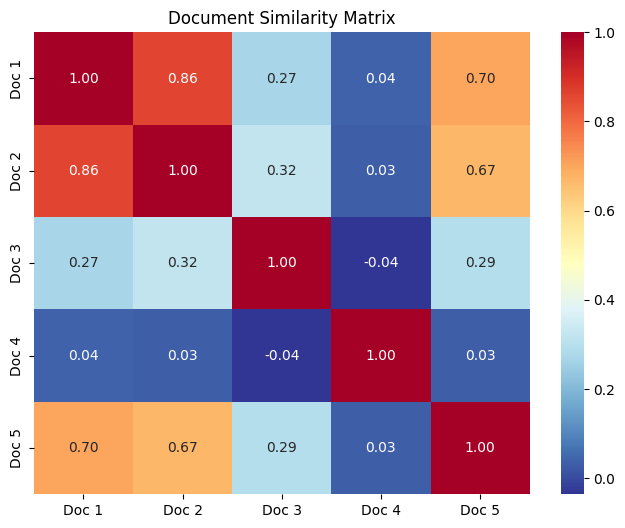

Document reference:
Doc 1: Python is great for programming
Doc 2: I enjoy coding with Python
Doc 3: Machine learning is fascinating
Doc 4: The weather is sunny today
Doc 5: Data science uses Python


In [ ]:
# Calculate similarity between all pairs
embeddings = model.encode(documents)
similarity_matrix = cosine_similarity(embeddings)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix,
            annot=True, fmt='.2f',
            cmap='RdYlBu_r',
            xticklabels=[f"Doc {i+1}" for i in range(len(documents))],
            yticklabels=[f"Doc {i+1}" for i in range(len(documents))])
plt.title('Document Similarity Matrix')
plt.show()

print("Document reference:")
for i, doc in enumerate(documents):
    print(f"Doc {i+1}: {doc}")


### Section A6: Building a Document Search Engine
Creating a system to search through many documents

In [ ]:
class SimpleSearchEngine:
    """Basic document search system"""

    def __init__(self):
        self.documents = []
        self.embeddings = None
        self.model = SentenceTransformer('all-MiniLM-L6-v2')

    def add_documents(self, docs):
        """Add documents to search index"""
        self.documents = docs
        self.embeddings = self.model.encode(docs)

    def search(self, query, top_k=3):
        """Search for similar documents"""
        if not self.documents:
            return []

        query_embedding = self.model.encode([query])
        similarities = cosine_similarity(query_embedding, self.embeddings)[0]

        # Get top results
        top_indices = similarities.argsort()[-top_k:][::-1]

        results = []
        for i, idx in enumerate(top_indices):
            results.append({
                'rank': i + 1,
                'document': self.documents[idx],
                'score': similarities[idx]
            })

        return results

# Create search engine
search_engine = SimpleSearchEngine()


### Section A7: Adding Documents with Metadata
Adding titles, categories, and other information to documents

In [ ]:
# Sample documents with metadata
documents_with_info = [
    {
        'title': 'Python Programming Basics',
        'category': 'Programming',
        'text': 'Python is a high-level programming language known for its simplicity and readability. Great for beginners learning to code.'
    },
    {
        'title': 'Machine Learning Introduction',
        'category': 'AI',
        'text': 'Machine learning enables computers to learn from data without explicit programming. Used in recommendation systems.'
    },
    {
        'title': 'Web Development with Python',
        'category': 'Programming',
        'text': 'Django and Flask are popular Python frameworks for building web applications and APIs.'
    },
    {
        'title': 'Data Science Fundamentals',
        'category': 'Data Science',
        'text': 'Data science combines statistics, programming, and domain knowledge to extract insights from data using Python libraries.'
    }
]

class AdvancedSearchEngine:
    """Search engine with metadata support"""

    def __init__(self):
        self.documents = []
        self.metadata = []
        self.embeddings = None
        self.model = SentenceTransformer('all-MiniLM-L6-v2')

    def add_documents(self, docs_with_metadata):
        """Add documents with their metadata"""
        self.documents = [doc['text'] for doc in docs_with_metadata]
        self.metadata = [{'title': doc['title'], 'category': doc['category']}
                        for doc in docs_with_metadata]
        self.embeddings = self.model.encode(self.documents)

    def search(self, query, top_k=3, category_filter=None):
        """Search with optional category filtering"""
        if not self.documents:
            return []

        query_embedding = self.model.encode([query])
        similarities = cosine_similarity(query_embedding, self.embeddings)[0]

        # Apply category filter
        if category_filter:
            valid_indices = [i for i, meta in enumerate(self.metadata)
                           if meta['category'] == category_filter]
        else:
            valid_indices = list(range(len(self.documents)))

        # Get similarities for valid documents only
        valid_similarities = [(i, similarities[i]) for i in valid_indices]
        valid_similarities.sort(key=lambda x: x[1], reverse=True)

        results = []
        for rank, (idx, score) in enumerate(valid_similarities[:top_k], 1):
            results.append({
                'rank': rank,
                'title': self.metadata[idx]['title'],
                'category': self.metadata[idx]['category'],
                'text': self.documents[idx][:100] + "...",
                'score': score
            })

        return results

# Create advanced search engine
advanced_engine = AdvancedSearchEngine()
advanced_engine.add_documents(documents_with_info)


### Section A8: Testing Different Search Queries
See how well our search engine works



In [ ]:
# Test different queries
test_queries = [
    "Python coding tutorial",
    "artificial intelligence",
    "web development",
    "data analysis"
]

for query in test_queries:
    print(f"\nQuery: '{query}'")
    results = advanced_engine.search(query, top_k=2)

    for result in results:
        print(f"  {result['rank']}. {result['title']} ({result['category']})")
        print(f"     Score: {result['score']:.3f}")



Query: 'Python coding tutorial'
  1. Python Programming Basics (Programming)
     Score: 0.679
  2. Data Science Fundamentals (Data Science)
     Score: 0.418

Query: 'artificial intelligence'
  1. Machine Learning Introduction (AI)
     Score: 0.437
  2. Data Science Fundamentals (Data Science)
     Score: 0.251

Query: 'web development'
  1. Web Development with Python (Programming)
     Score: 0.461
  2. Python Programming Basics (Programming)
     Score: 0.315

Query: 'data analysis'
  1. Data Science Fundamentals (Data Science)
     Score: 0.415
  2. Machine Learning Introduction (AI)
     Score: 0.224


### Section A9: Category Filtering
Search within specific categories only

In [ ]:
# Test category filtering
programming_query = "coding basics"

print(f"Query: '{programming_query}' (all categories)")
all_results = advanced_engine.search(programming_query, top_k=3)
for result in all_results:
    print(f"  {result['title']} ({result['category']})")

print(f"\nQuery: '{programming_query}' (Programming only)")
filtered_results = advanced_engine.search(programming_query, top_k=3,
                                        category_filter="Programming")
for result in filtered_results:
    print(f"  {result['title']} ({result['category']})")


Query: 'coding basics' (all categories)
  Python Programming Basics (Programming)
  Machine Learning Introduction (AI)
  Data Science Fundamentals (Data Science)

Query: 'coding basics' (Programming only)
  Python Programming Basics (Programming)
  Web Development with Python (Programming)


### Section A10: Document Clustering
Automatically group similar documents together

In [ ]:
from sklearn.cluster import KMeans

def cluster_documents(embeddings, n_clusters=2):
    """Group documents by similarity"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)
    return cluster_labels

# Cluster the documents
clusters = cluster_documents(advanced_engine.embeddings, n_clusters=2)

print("Document clusters:")
for i, (meta, cluster) in enumerate(zip(advanced_engine.metadata, clusters)):
    print(f"  {meta['title']} -> Cluster {cluster + 1}")

# Show cluster composition
for cluster_id in range(2):
    docs_in_cluster = [advanced_engine.metadata[i]['title']
                      for i in range(len(clusters))
                      if clusters[i] == cluster_id]
    print(f"\nCluster {cluster_id + 1}: {docs_in_cluster}")


Document clusters:
  Python Programming Basics -> Cluster 2
  Machine Learning Introduction -> Cluster 1
  Web Development with Python -> Cluster 2
  Data Science Fundamentals -> Cluster 2

Cluster 1: ['Machine Learning Introduction']

Cluster 2: ['Python Programming Basics', 'Web Development with Python', 'Data Science Fundamentals']


### Section A11: Similarity Network Visualization
Show how documents connect to each other

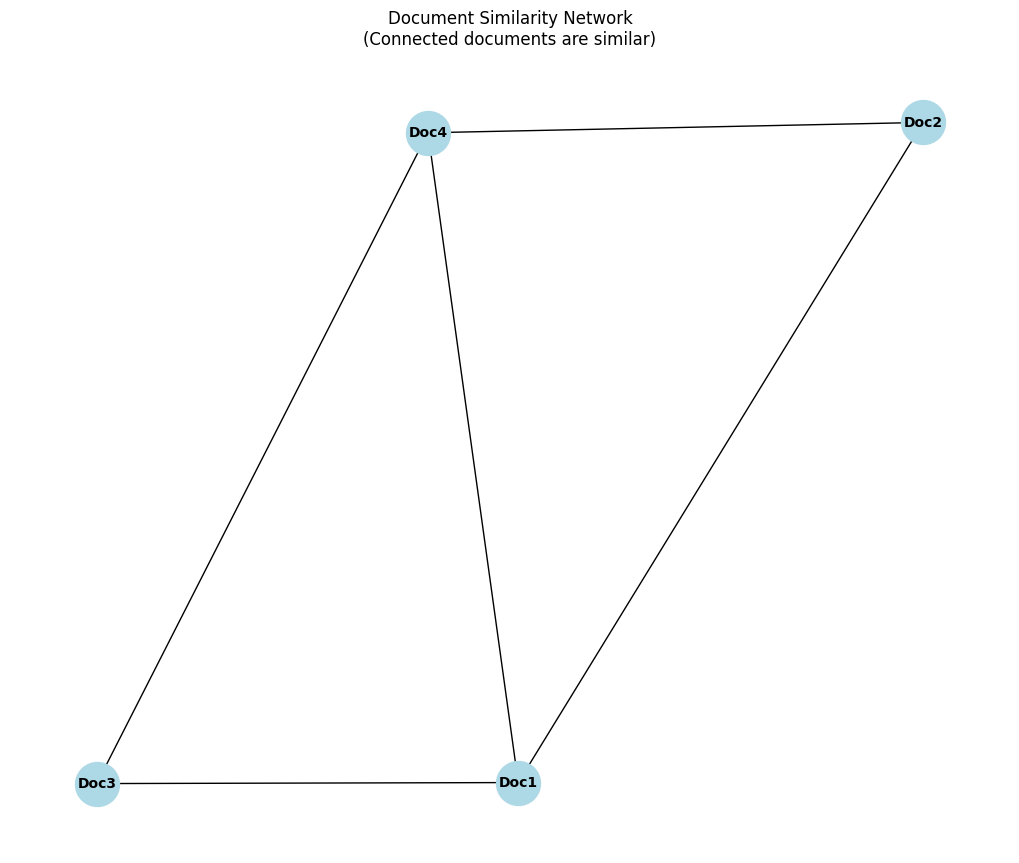

Document reference:
  Doc1: Python Programming Basics
  Doc2: Machine Learning Introduction
  Doc3: Web Development with Python
  Doc4: Data Science Fundamentals


In [ ]:
import networkx as nx

def create_document_network(embeddings, metadata, threshold=0.3):
    """Create network of connected documents"""
    similarity_matrix = cosine_similarity(embeddings)

    # Create graph
    G = nx.Graph()

    # Add nodes
    for i, meta in enumerate(metadata):
        G.add_node(i, title=meta['title'][:20])

    # Add edges for similar documents
    for i in range(len(embeddings)):
        for j in range(i+1, len(embeddings)):
            if similarity_matrix[i][j] > threshold:
                G.add_edge(i, j, weight=similarity_matrix[i][j])

    return G

# Create and visualize network
network = create_document_network(advanced_engine.embeddings,
                                 advanced_engine.metadata,
                                 threshold=0.2)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(network, seed=42)

nx.draw(network, pos,
        with_labels=True,
        labels={i: f"Doc{i+1}" for i in network.nodes()},
        node_color='lightblue',
        node_size=1000,
        font_size=10,
        font_weight='bold')

plt.title('Document Similarity Network\n(Connected documents are similar)')
plt.show()

print("Document reference:")
for i, meta in enumerate(advanced_engine.metadata):
    print(f"  Doc{i+1}: {meta['title']}")


### Section A12: Search Quality Evaluation
Measuring how good our search results are

In [ ]:
def evaluate_search_quality(engine, test_cases):
    """Test search accuracy"""

    correct_predictions = 0
    total_tests = 0

    for query, expected_category in test_cases:
        results = engine.search(query, top_k=1)

        if results and results[0]['category'] == expected_category:
            correct_predictions += 1

        total_tests += 1

        print(f"Query: '{query}'")
        print(f"  Expected: {expected_category}")
        if results:
            print(f"  Got: {results[0]['category']}")
            print(f"  Correct: {'Yes' if results[0]['category'] == expected_category else 'No'}")
        print()

    accuracy = correct_predictions / total_tests
    print(f"Search accuracy: {accuracy:.1%} ({correct_predictions}/{total_tests})")
    return accuracy

# Test search quality
test_cases = [
    ("Python web framework", "Programming"),
    ("machine learning algorithms", "AI"),
    ("data visualization", "Data Science"),
    ("programming tutorial", "Programming")
]

accuracy = evaluate_search_quality(advanced_engine, test_cases)


Query: 'Python web framework'
  Expected: Programming
  Got: Programming
  Correct: Yes

Query: 'machine learning algorithms'
  Expected: AI
  Got: AI
  Correct: Yes

Query: 'data visualization'
  Expected: Data Science
  Got: Data Science
  Correct: Yes

Query: 'programming tutorial'
  Expected: Programming
  Got: Programming
  Correct: Yes

Search accuracy: 100.0% (4/4)
